In [3]:
from wand.image import Image as WImage
from typing import List

# Лабораторная работа 2. Методы поиска
**Цель работы**: ознакомление с алгоритмами поиска в линейных и нелинейных структурах и оценкой эффективности алгоритмов.

## Поиск по последовательности
### Бинарный поиск
Бинарный поиск - это алгоритм поиска элемента в заранее упорядоченной по возростанию последовательности. На каждом этапе поиска происходит отсечение непрегодных элементов в зависимости от того больше ли искомый элемент серединного элемента или меньше(при условии что они не равны). За счет такого алгоритма достигается максимальная скорость поиска нужных элементов в очень больших последовательностях.
  - В худшем случае: $O(log(n))$
  - В лучшем случае: $O(1)$
  - В среднем: $O(log(n))$

### Блок-схема

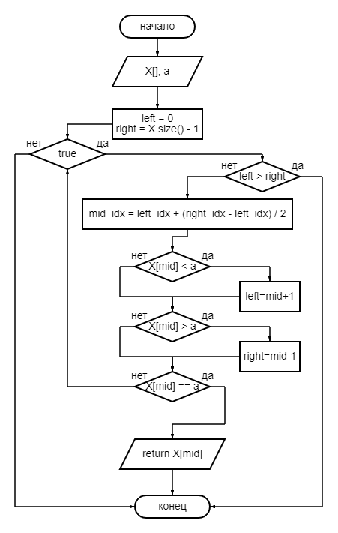

In [4]:
from wand.image import Image as WImage
img = WImage(filename='diagram.pdf')
img

### Псевдокод

```
int binary_search(int *X, int a) {
    size = sizeof(X)/sizeof(X[0])
    int mid_idx, left_idx, right_idx = nullptr, 0, size - 1
    while (true) {
        if (left_idx > right_idx) {
            return nullptr;
        }
        mid_idx = left_idx + (right_idx - left_idx) / 2
        if (X[mid_idx] < a) {
            left_idx = mid_idx + 1;
        }
        if (X[mid_idx] > a) {
            right_idx = mid_idx - 1;
        }
        if (X[mid_idxmi] == a) {
            return X[mid_idx]
        }
    }
}
```

### Особенности

Достоинства алгоритма:

    -- простота реализации
    -- очень высокая скорость поиска в больших последовательностях

Недостатки:

    -- подходит только для поиска по упорядоченной по возростанию последовательности

### Реализация

In [5]:
def binary_search(X: List, a):
    mid_idx, left_idx, right_idx = None, 0, len(X) - 1
    while True:
        if left_idx > right_idx:
            return None
        mid_idx = left_idx + (right_idx - left_idx) // 2
        if X[mid_idx] < a:
            left_idx = mid_idx + 1
        if X[mid_idx] > a:
            right_idx = mid_idx - 1
        if X[mid_idx] == a:
            return X[mid_idx]


### Тестирование

In [6]:
assert binary_search([1, 2, 3, 4, 5], 4) == 4, 'Ошибка при нахождении входящего значения'

assert not binary_search([1, 2, 3, 4, 5], 0), 'Ошибка при не нахождении не входящего значения'

In [33]:
from datetime import datetime
from random import randint
import time

sizes = [100_000, 1_000_000, 10_000_000, 100_000_000]

relation = {}

for size in sizes:
    nums = list(range(size))
    n = (size // 2) + 2
    start_time = datetime.now()
    a = binary_search(nums, n)
    delta = datetime.now() - start_time
    relation[size] = str(delta).split(':')[2]
print(relation)

{100000: '00', 1000000: '00', 10000000: '00', 100000000: '00.014561'}


Вывод: бинарный поиск очень быстрый, время поиска элемента занимает наносекунды!

## Поиск подстроки в строке
### Алгоритм Бойера — Мура
Это уникальный алгоритм, который считается наиболее быстрым среди алгоритмов общего назначения, предназначенных для поиска подстроки в строке. Важной особенностью алгоритма является то, что он выполняет сравнения в шаблоне справа налево в отличие от многих других алгоритмов.

Предварительно требуется составить таблицу смещений для алфавита символов и суффиксов искомой строки (до последнего вхождения). Если смещение по таблице символов отрицательное(происходит влево), то применяется смещение из таблицы суффиксов. Сущевствуют различные модификации данного алгоритма, но они превосходят по скорости только при случайной строке.

Алгоритм Бойера-Мура считается наиболее эффективным алгоритмом поиска шаблонов в стандартных приложениях и командах, таких как Ctrl+F в браузерах и текстовых редакторах. 


### Блок-схема

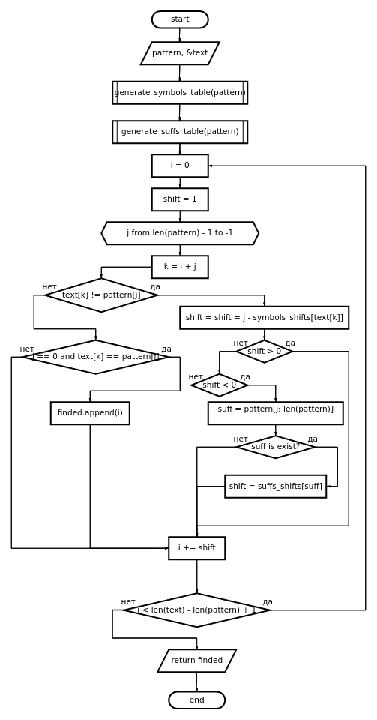

In [5]:
from wand.image import Image as WImage
img = WImage(filename='./diagram(2).pdf')
img

### Псевдокод

```
int find(const string pattern, const string &text){
    size_t pattern_counter = 0
    map symbols_shifts = create_symbol_shift_table(pattern)
    map suffs_shifts = create_suff_shift_table(pattern)
    int shift;
    for(int i = 0; i < text.size() - pattern.size() + 1; i+=shift){
        shift = 1
        for(int j = pattern.size() - 1; j > -1; j--){
            int k = i + j
            if(text[k] != pattern[j]){
               shift = j - symbols_shifts[text[k]]
               if(shift > 0){
                   break
               }
               if(shift < 0){
                   string suff = substr(j, pattern.size())
                   if(suff){
                       shift = suffs_shifts[]
                   }
                   break
               }
            else if(j == 0 && text[k] == pattern[j]){
                   pattern_counter++
            }
        }
    }
}
```

### Особенности
Достоинства алгоритма:

    -- в среднем самый быстрый алгоритм поиска подстрок
    -- широко распространен

Недостатки:

    -- предварительные расчены перед непосредственным поиском

### Реализация

In [7]:
def create_symbol_shift_table(pattern: str) -> dict:
    symbol_shift_table = dict()
    for code in range(0, 256):
        letter = chr(code)
        if letter in pattern:
            for i in range(len(pattern) - 1, -1, -1):
                if pattern[i] == letter:
                    symbol_shift_table[letter] = i
                    break
        else:
            symbol_shift_table[letter] = -1
    return symbol_shift_table


def create_suff_shift_table(pattern: str) -> dict:
    suff_shift_table = dict()
    begin_suff = None
    for j in range(len(pattern) - 1, -1, -1):
        suff = pattern[j:len(pattern)]
        patt = pattern[0:len(pattern) - 1]
        if suff in patt:
            suff_shift_table[suff] = j - patt.rfind(suff)
        else:
            subsuff = pattern[j + 1:len(pattern)]
            if subsuff == pattern[0:len(subsuff)]:
                begin_suff = subsuff
            if begin_suff and begin_suff in suff:
                suff_shift_table[suff] = suff_shift_table[subsuff]
            else:
                suff_shift_table[suff] = len(pattern)
    return suff_shift_table


def find(pattern: str, text: str) -> list:
    finded = []
    symbols_shifts = create_symbol_shift_table(pattern)
    suffs_shifts = create_suff_shift_table(pattern)
    i = 0
    while i < len(text) - len(pattern) + 1:
        shift = 1
        for j in range(len(pattern) - 1, -1, -1):
            k = i + j
            if text[k] != pattern[j]:
                shift = j - symbols_shifts[text[k]]
                if shift > 0:
                    break
                if shift < 0:
                    suff = pattern[j: len(pattern)]
                    if suff:
                        shift = suffs_shifts[suff]
                    break
            elif j == 0 and text[k] == pattern[j]:
                finded.append(i)
        i += shift
    return finded

### Тестирование

In [8]:
with open("Hobbit_or_There_and_Back_Again-J_R_R_Tolkien.txt") as file:
    text = file.read()

finded = find('Gandalf', text)
print(f'Total:{len(finded)}', '', 'In positions:', finded, sep='\n')

Total:132

In positions:
[4472, 4489, 4999, 5737, 6569, 6900, 6913, 7055, 7064, 7643, 8998, 9410, 9517, 9900, 10856, 10890, 12181, 14973, 16036, 16628, 17512, 18251, 19684, 19796, 22615, 22676, 23434, 24233, 24775, 25761, 27720, 27916, 28476, 30403, 30740, 31393, 40156, 40471, 40734, 41640, 42033, 43595, 46554, 47967, 48091, 50154, 50257, 52927, 53361, 54580, 55538, 56479, 56528, 58057, 60188, 60398, 62006, 62346, 69695, 69737, 70300, 71431, 72618, 72735, 104648, 106014, 106204, 107632, 108022, 108901, 109176, 109848, 109954, 112053, 113028, 113994, 115651, 115982, 117296, 117682, 121987, 122096, 122640, 125447, 125638, 125910, 126501, 128808, 129727, 133401, 134955, 135100, 135353, 135486, 137164, 137657, 138424, 139335, 139439, 139856, 141402, 141532, 141546, 142180, 142518, 142719, 143609, 147850, 152318, 153117, 154378, 154524, 155003, 187314, 298245, 298422, 301249, 301514, 303058, 307232, 307734, 307874, 308885, 310540, 314794, 317236, 317625, 321218, 324890, 325123, 326243, 3278